In [11]:
"""
https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2
"""

'\nhttps://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2\n'

In [45]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [46]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [47]:
def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [58]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    print(x1)
    print(m)
    print(c)
    print(x2)
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    #plt.xlim([-2, 2])
    #plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [49]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [67]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        """
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        """
        # Calculating hypothesis/prediction.
        y_hat = sigmoid(np.dot(X, w) + b)

        # Getting the gradients of loss w.r.t parameters.
        dw, db = gradients(X, y, y_hat)

        # Updating the parameters.
        w -= lr*dw
        b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [68]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [69]:
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings( "ignore" )
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)


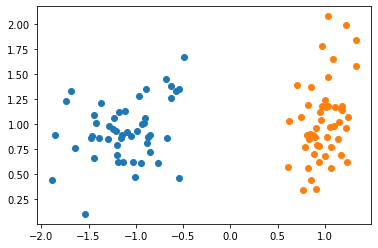

In [70]:
good = X[y == 0]
bad = X[y == 1]
plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])

In [75]:
print(X.shape)

(100, 2)


[-1.8887398191896665, 1.329702988273395]
[-41.5427495]
[-0.17991311]
[ 78.28353206 -55.41943126]


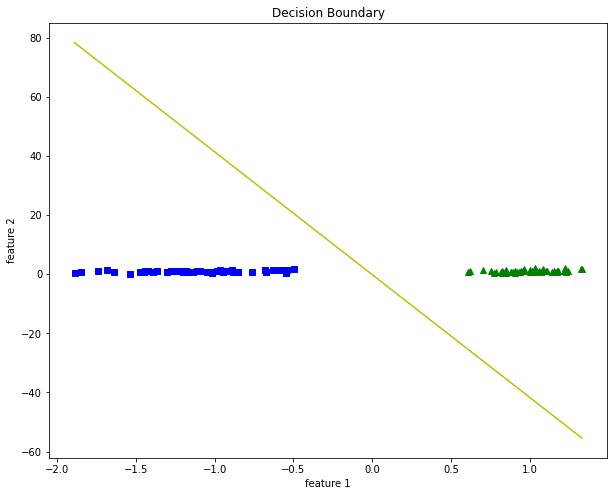

In [71]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [76]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

accuracy(y, y_hat=predict(X))

0.77

(100, 2)
(100,)


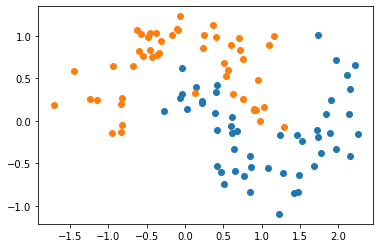

In [88]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

good = X[y == 0]
bad = X[y == 1]
plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])

print(X.shape)
print(y.shape)

[-1.1221150101799862, 2.2921835407285474]
[0.87089977]
[-0.15915409]
[-1.1364038   1.83710803]


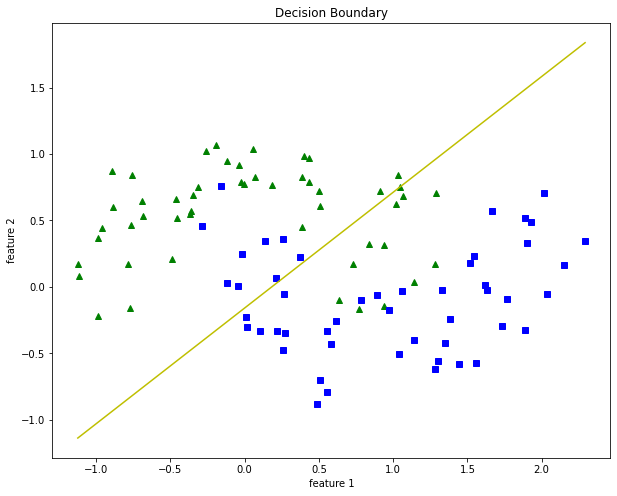

In [81]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [57]:
accuracy(y, predict(X))

0.79

(99, 2)
(99,)


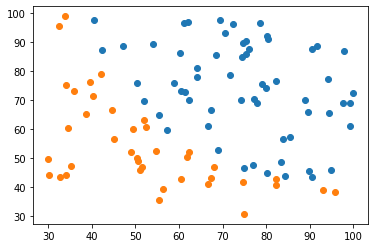

In [92]:
import pandas as pd
data = pd.read_csv("../../datasets/marks.txt")

X = data.iloc[:,:-1].values
y = data.iloc[:, -1]
good = X[y == 0]
bad = X[y == 1]

y = np.array(y)

print(X.shape)
print(y.shape)

plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])

[30.05882244669796, 99.82785779692128]
[-2.87861523]
[8.87696874]
[ -77.65081531 -278.48902297]


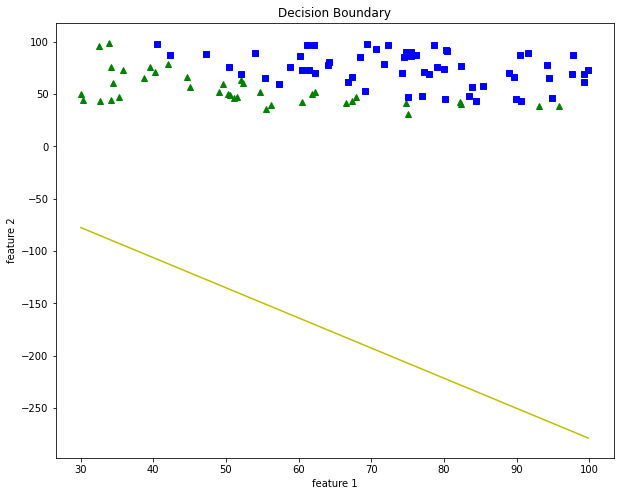

In [93]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)